<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/></p></center>

<h1><center><font size=6>Introduction to Natural Language Processing:</center></font></h1>
<h2><center>Twitter US Airline Sentiment</center></h2>
<h2><center>Project #9</center></h2>
<h3><center>Craig Drummond</center></h3>

# Context

# Background and Context

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


# Objective



# Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

---
# Keys to Success

Citeria                                                          | Done       
-----------------------------------------------------------------|----------
Define the problem, import libraries, load and describe the data | ✅
Exploratory Data Analysis                                        | ✅
Understanding of Data Columns                                    | ✅
Data Pre-Processing                                              | ✅
Text Vectorization                                               |
  - CountVectorizer                                              | ✅
  - TfidfVectorizer                                              | ✅
Model Building and Evaluation                                    | 
  - Cross-validate the model performance                         | ✅
  - Evaluate each model using confusion matrix                   | ✅
  - Print top 40 features and plot word clouds with both vectoizations                                                  | ✅
Summary of the various Preprocessing, vectorization, and model performance                                                      | ✅
Well commneted and organized notebook.  Consistent structure and flow | ✅

---



# Question to Answer

1. How accurately can sentiment analysis be predicted from tweets



---------------------------------------------------------------------------

# Import Libraries

In [1]:
# Import the time library so that the amount of time this notebook takes to run can be processed
import time

begin_total = time.time()


In [2]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import the necessary other libraries and setting certain settings for this notebook to run to compltion

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# primary data manipulation libraries
import os                                         # Common Python library for working with the Operating System
import math                                       # Common Python library for perfoming math opertions
import random                                     # Common Python library for generating random numbers
import re, string, unicodedata

# Standard ML Libraries
import pandas as pd                               # Pandas for loading data
import numpy as np                                # Numpy for Matrix operations

from collections import Counter

# nltk import and downloading
import nltk

nltk.download('stopwords')                        # Download specific nltk libraries
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# data visualization libraries
import matplotlib.pyplot as plt                   # MatPlotLib for plotting and visualizations
import seaborn as sns                             # Seaborn for generating graphs

%matplotlib inline

# libraries for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator                 
                                                  

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# keras libraties
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer

# some messages about depracated methods...  Using what they suggest but 
# may need to return to the deprecated methods of time get short and I 
# have any problems with pad_sequences
#from tensorflow.keras.utils.text_dataset_from_directory import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam, SGD
from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16


#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models Used in this notebook
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Other libraries
from imblearn.over_sampling import SMOTE
from PIL import Image
import contractions
from bs4 import BeautifulSoup

# remove number of displayed columns limit
pd.set_option("display.max_columns", None)

# set limit on the number of rows to display
pd.set_option("display.max_rows", 200)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Custom Functions Used in this Notebook

## Data Cleaning Functions

In [4]:
# setup some data cleaning semi-global variables

lemmatizer = WordNetLemmatizer()

custom_stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

custom_stopwords = list(set(custom_stopwords) - set(customlist))                


### strip_html

In [5]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()


### replave_contractions

In [6]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

### remove_numbers

In [7]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

### remove_non_ascii

In [8]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

### to_lowercase

In [9]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

### remove_punctuation

In [10]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### remove_stopwords

In [11]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in custom_stopwords:
            new_words.append(word)
    return new_words

### lemmatize_list

In [12]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

### cloud_of_words

In [13]:
def cloud_of_words(words):
  plt.figure(figsize=(25,50))
  #dframe=pd.dDataFrame(words, columns=['words'])
  word_cloud = WordCloud(min_font_size=3, max_words = 1000, width = 1600, height=720).generate("".join(words))
  plt.imshow(word_cloud, interpolation='bilinear')

### analyzer

In [14]:
def analyzer(words, step):
  print(f"{step}")
  print(f"Number of words: {len(words)}")
  print("-"*50)

In [15]:
def normalize(words):
    """ 
    This function calls each of the above functions in turn to normalize 
    or strip out information that is not usefull for the models.
    """
    
    words = remove_non_ascii(words) 
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    
    return ' '.join(words)

## show_wordcloud

In [16]:
def show_wordcloud(data, field, title):
    text = ' '.join(data[field].astype(str).tolist())              
    stopwords = set(STOPWORDS)                                  
    
    fig_wordcloud = WordCloud(stopwords=stopwords,background_color='white',
                              colormap='viridis', width=1600, height=720).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

## new_model

In [17]:
def new_model():
  backend.clear_session()
  
  np.random.seed(1)
  random.seed(1)
  tf.random.set_seed(1)

## Labeled_barplot

In [18]:
# function to create labeled barplots

def labeled_barplot(data, feature, title, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    if v_ticks is True:
        plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    ax.set_title(label=title, fontsize=20)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Connect to Google Colab

In [19]:
# Connecting to Google Colab requires a manual intervention. That makes running the notebook end to end impossible.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the data

In [20]:
# Load Data
project_path = '/content/drive/My Drive/Colab Notebooks/10 - Introduction to NLP/Project9/'
data_file = 'Tweets.csv'

data = pd.read_csv(project_path+data_file)

In [21]:
print(f"Shape of the data: {data.shape}")


Shape of the data: (14640, 15)


# EDA

## Checking for Data imbalance

In [22]:
print(f"Total number of sentiment tweets\n{data.airline_sentiment.value_counts()}")

Total number of sentiment tweets
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


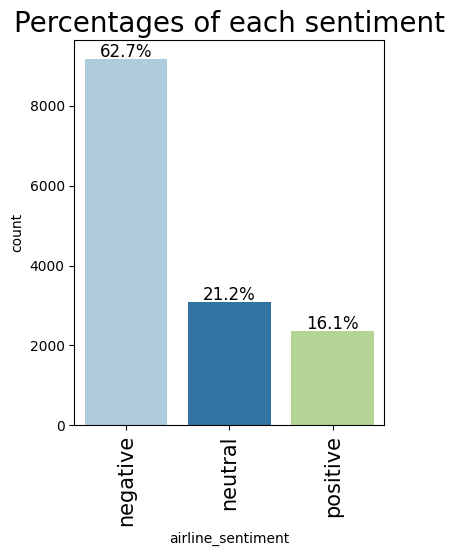

In [23]:
labeled_barplot(data, 'airline_sentiment', 'Percentages of each sentiment', perc=True, v_ticks = True)

### Note:
- The data is significantly imbaalaned with a majority of the tweets being negative

## Look at the data and clean things up before EDA

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [25]:
data.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [26]:
print("Percentage of data in each column that is null")
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Percentage of data in each column that is null


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

### Notes

- Columns like airline_sentiment_gold, negativereason_gold, and tweet_coor that are missing between 93% and 99.78% MISSING will just be deleted
- The tweet_id column is just a unique identifier and will also be removed

In [27]:
# Delete airline_sentiment_gold, negativereason_gold, and tweet_coor colums from the data

data.drop(data.columns[[11]], axis=1, inplace = True)   # tweet_coord
data.drop(data.columns[[8]], axis=1, inplace = True)    # negativereason_gold
data.drop(data.columns[[6]], axis=1, inplace = True)    # airline_sentiment_gold
data.drop(data.columns[[0]], axis=1, inplace = True)    # tweet_id


In [28]:
print(f"Ther are {data.duplicated().sum()} rows that are duplicates")


Ther are 39 rows that are duplicates


In [29]:
data.head(5)

airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason_confidence         airline        name  retweet_count  \
0                        NaN  Virgin America     cairdin              0   
1                     0.0000  Virgin America    jnardino              0   
2                        NaN  Virgin America  yvonnalynn              0   
3                     0.7033  Virgin America    jnardino              0   
4                     1.0000  Virgin America    jnardino              0   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

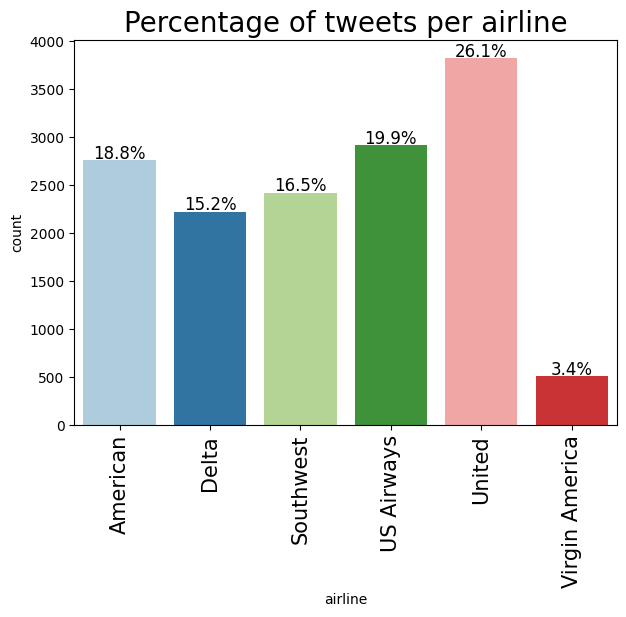

In [30]:
labeled_barplot(data, 'airline', 'Percentage of tweets per airline', perc=True)

### Notes
- With the exception of Virgin America the other airlines are relatively well balanced.  This could make balancing the sentiment more dificult

In [31]:
print(f"Total number of tweets per airline\n{data.groupby('airline')['airline_sentiment'].count()}")

Total number of tweets per airline
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


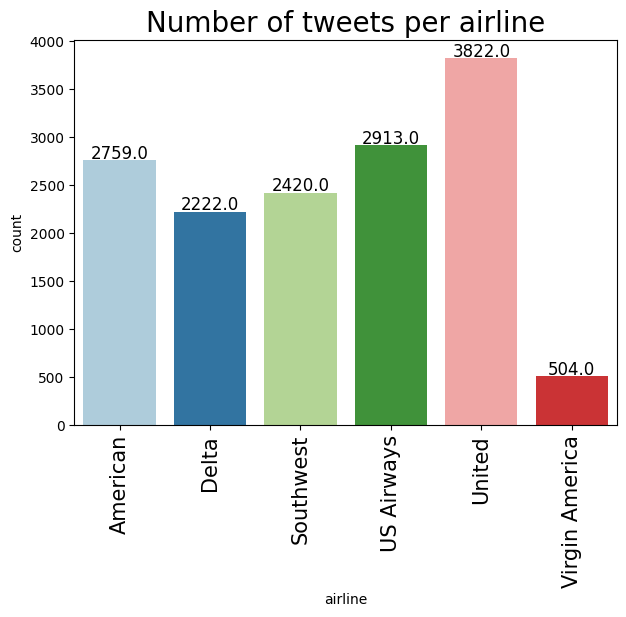

In [32]:
labeled_barplot(data, 'airline', 'Number of tweets per airline', perc=False)

In [33]:
print(f"Total number of tweets grouped by sentiment for each airline")
airlines = ['American', 'Delta', 'Southwest', 'United', 'US Airways', 'Virgin America']
for airline in airlines:
  print(f"{airline}\n{data.loc[data.airline == airline].airline_sentiment.value_counts()}\n")
  

Total number of tweets grouped by sentiment for each airline
American
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64

Delta
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64

Southwest
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64

United
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64

US Airways
negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64

Virgin America
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64



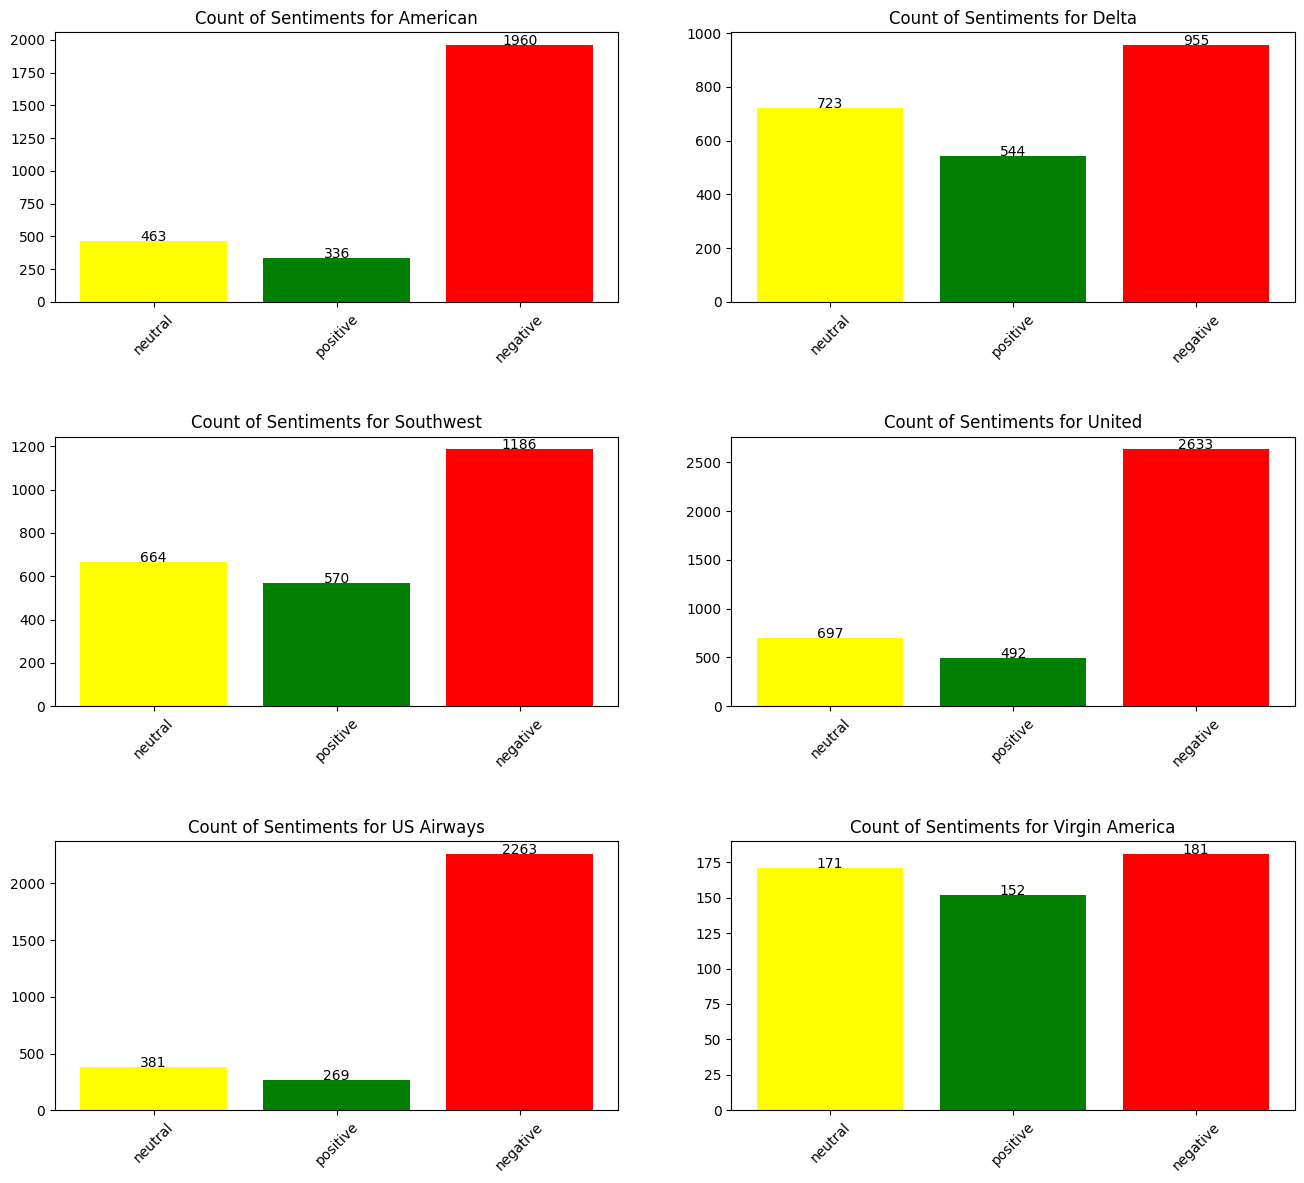

In [34]:
sentiment_count = data['airline_sentiment'].value_counts()

def SCount(airline):
  airline_name = data[data['airline']==airline]
  count = airline_name['airline_sentiment'].value_counts()
  unique_sentiment = data['airline_sentiment'].unique()
  sentiment_frame=pd.DataFrame({'Sentiment': unique_sentiment})
  sentiment_frame['count']=sentiment_frame['Sentiment'].apply(lambda x: count[x])
  return sentiment_frame

def add_labels(id, count, ha):
  for i in range(len(id)):
    plt.text(i, count[i], count[i], ha=ha)
    
def Plot_Sentiment(airline):
  a = SCount(airline)
  count = a['count']
  plt.bar(a['Sentiment'], a['count'], color=['yellow', 'green', 'red'])
  plt.xticks(a['Sentiment'], a['Sentiment'], rotation=45)
  plt.title(f'Count of Sentiments for {airline}')
  add_labels(a['Sentiment'], a['count'], 'center')

plt.figure(2, figsize=(16,14))
for airline in airlines:
  index = airlines.index(airline)
  plt.subplot(3, 2, index+1)
  plt.subplots_adjust(hspace=0.5)
  Plot_Sentiment(airline)

## Reasons for Negative Tweets

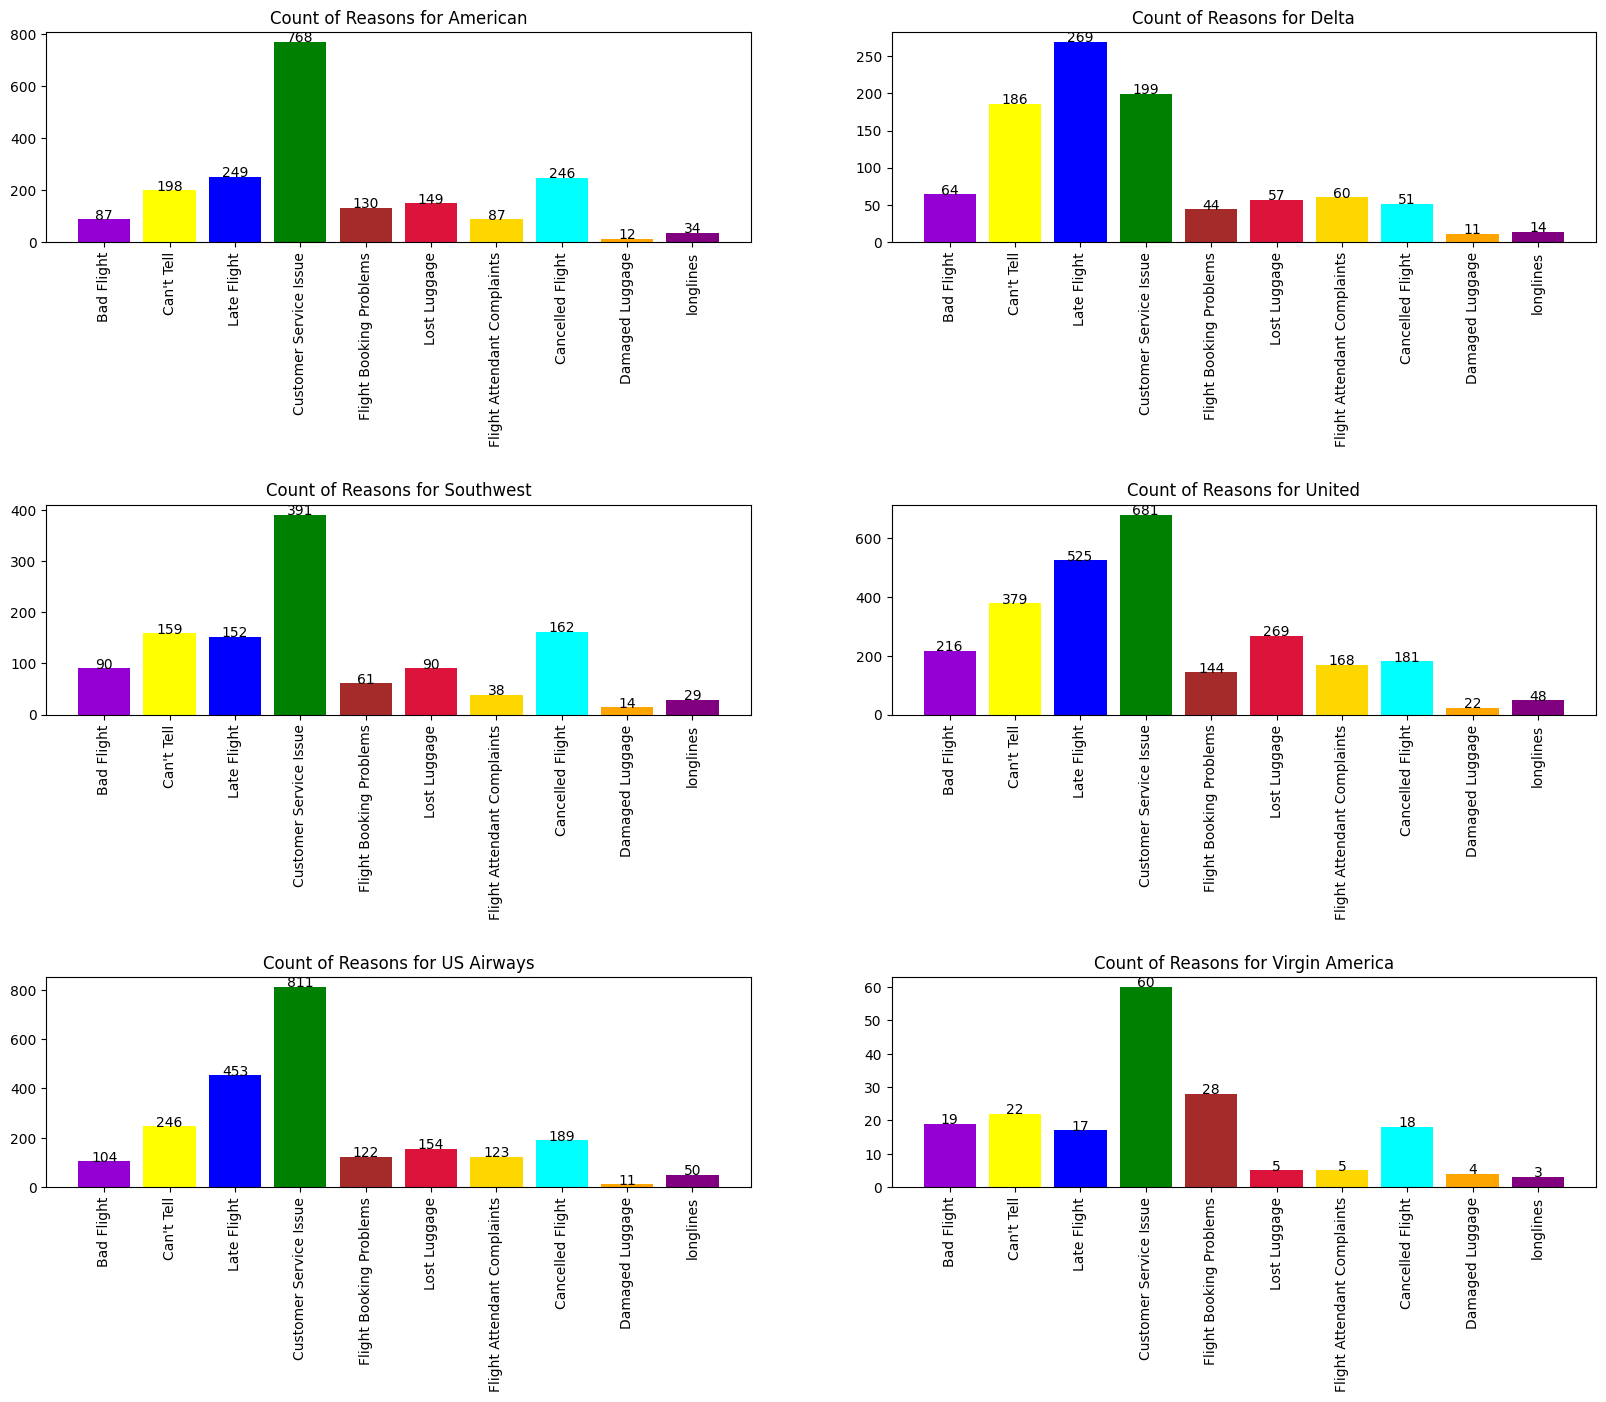

In [35]:
Negative_Reason_Count = data['negativereason'].value_counts()

def NegativeReasonCount(airline):
    airlineName =data[data['airline']==airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NegativeReasonCount(airline)
    count=a['count']
    Id = range(0,(len(a)))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','green','brown','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    add_labels(Id, count, 'center')
    
plt.figure(2,figsize=(20, 15))
for airline in airlines:
    indices= airlines.index(airline)
    plt.subplot(3,2,indices+1)
    plt.subplots_adjust(hspace=1.25)
    Plot_Reason(airline)

## Word Clouds for the different sentiments

In [36]:
# Create differnet datafrmes for each of the sentiments
positive=data[data['airline_sentiment'] == 'positive']
neutral=data[data['airline_sentiment'] == 'neutral']
negative=data[data['airline_sentiment'] == 'negative']

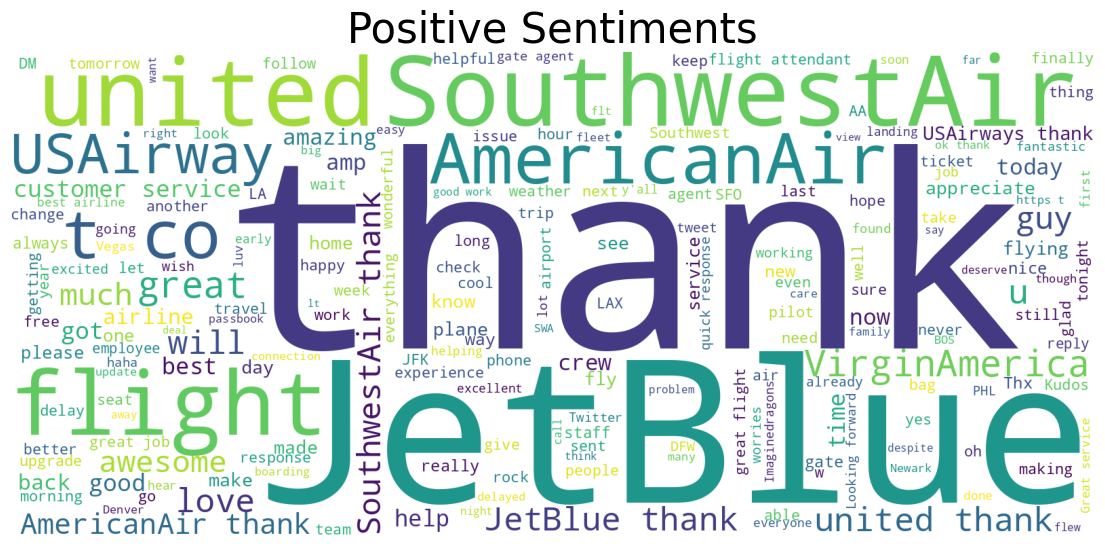

In [37]:
show_wordcloud(positive, "text", "Positive Sentiments")

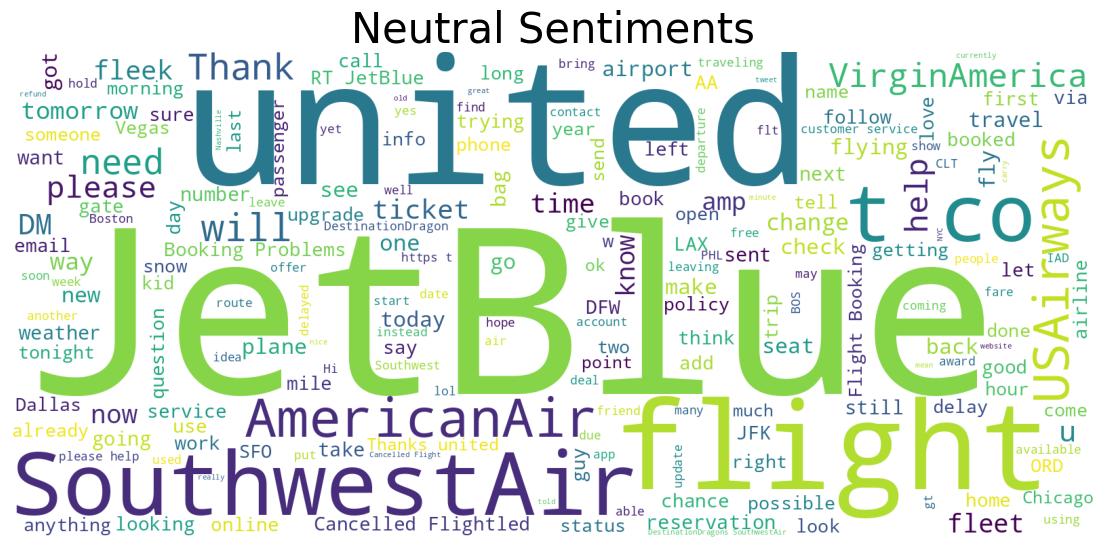

In [38]:
show_wordcloud(neutral, "text", "Neutral Sentiments")

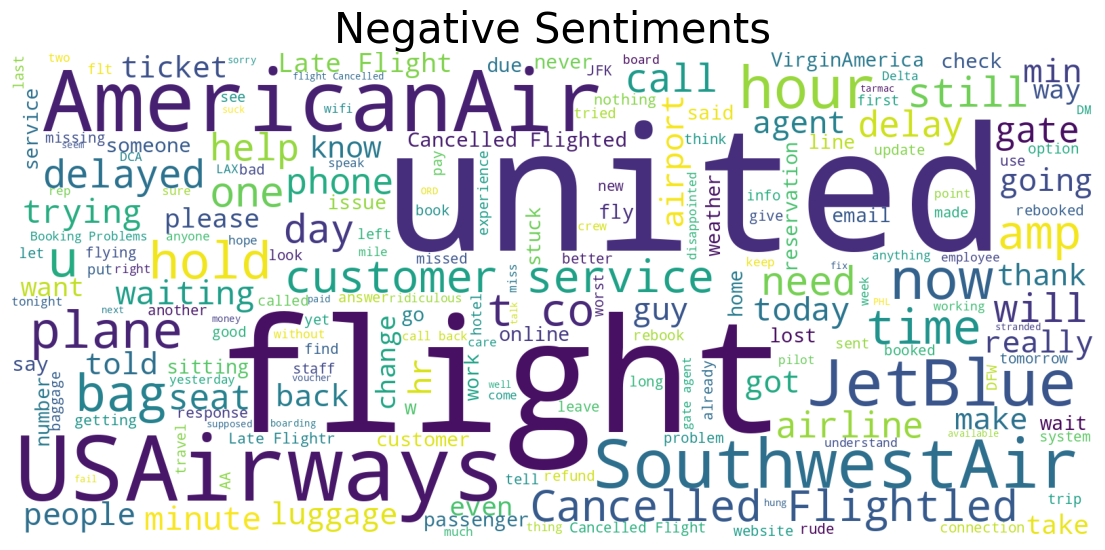

In [39]:
show_wordcloud(negative,"text", "Negative Sentiments")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   name                          14640 non-null  object 
 6   retweet_count                 14640 non-null  int64  
 7   text                          14640 non-null  object 
 8   tweet_created                 14640 non-null  object 
 9   tweet_location                9907 non-null   object 
 10  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


## Does Tweet Location have any impact on sentiment

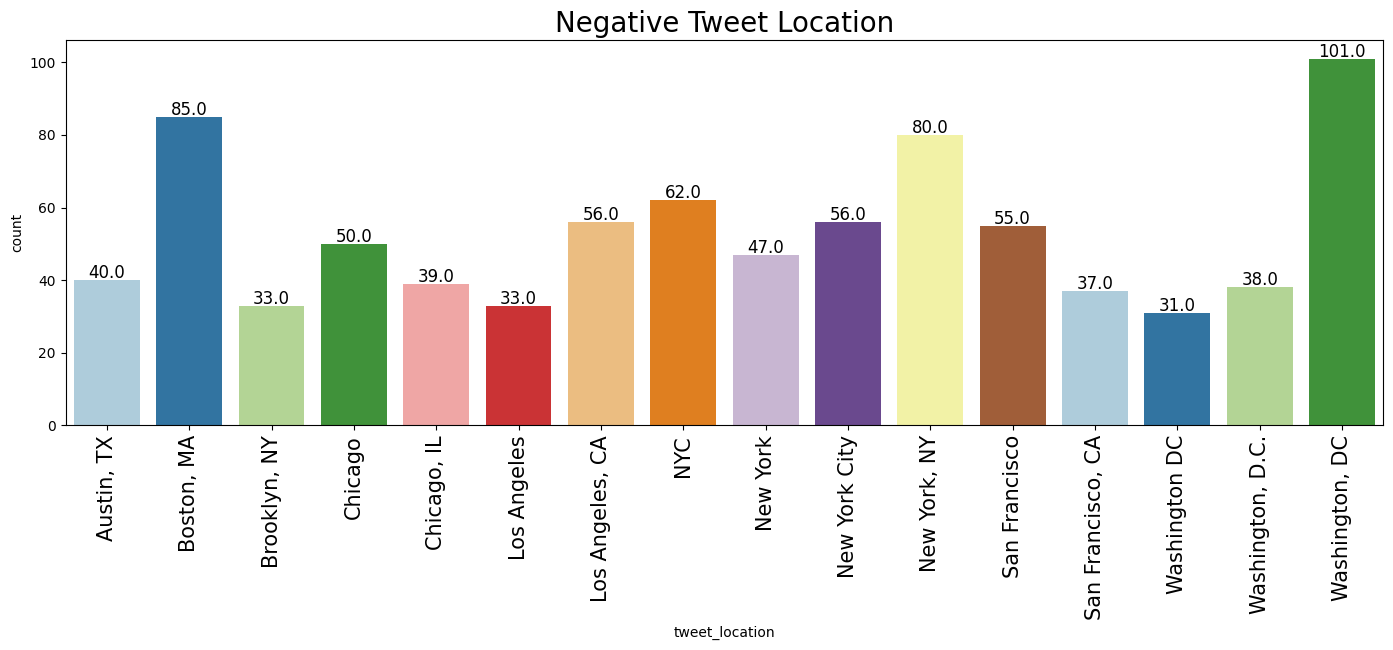

In [41]:
location_negative = negative.dropna()
location_negative = location_negative.reset_index(drop=True)
location_negative['loc_count'] = location_negative['tweet_location'].map(location_negative['tweet_location'].value_counts())
location_negative = location_negative[location_negative["loc_count"] > 30]
labeled_barplot(location_negative, 'tweet_location', "Negative Tweet Location", perc=False)

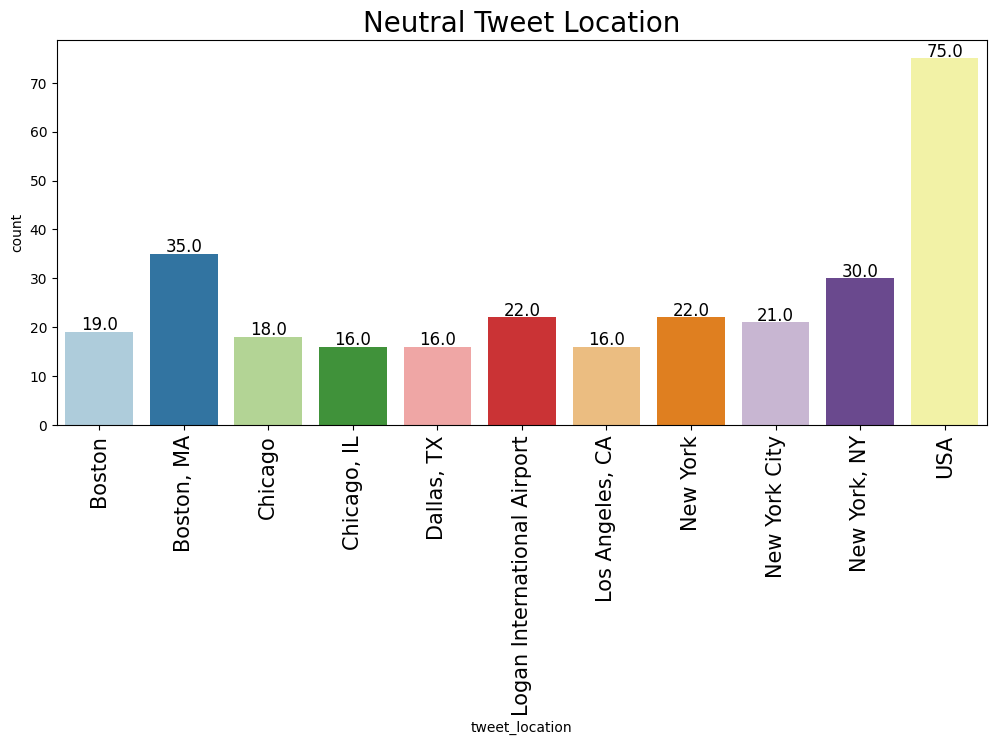

In [42]:
location_neutral = neutral
location_neutral['loc_count'] = location_neutral['tweet_location'].map(location_neutral['tweet_location'].value_counts())
location_neutral = location_neutral[location_neutral["loc_count"] > 15]
labeled_barplot(location_neutral, 'tweet_location', "Neutral Tweet Location", perc=False)

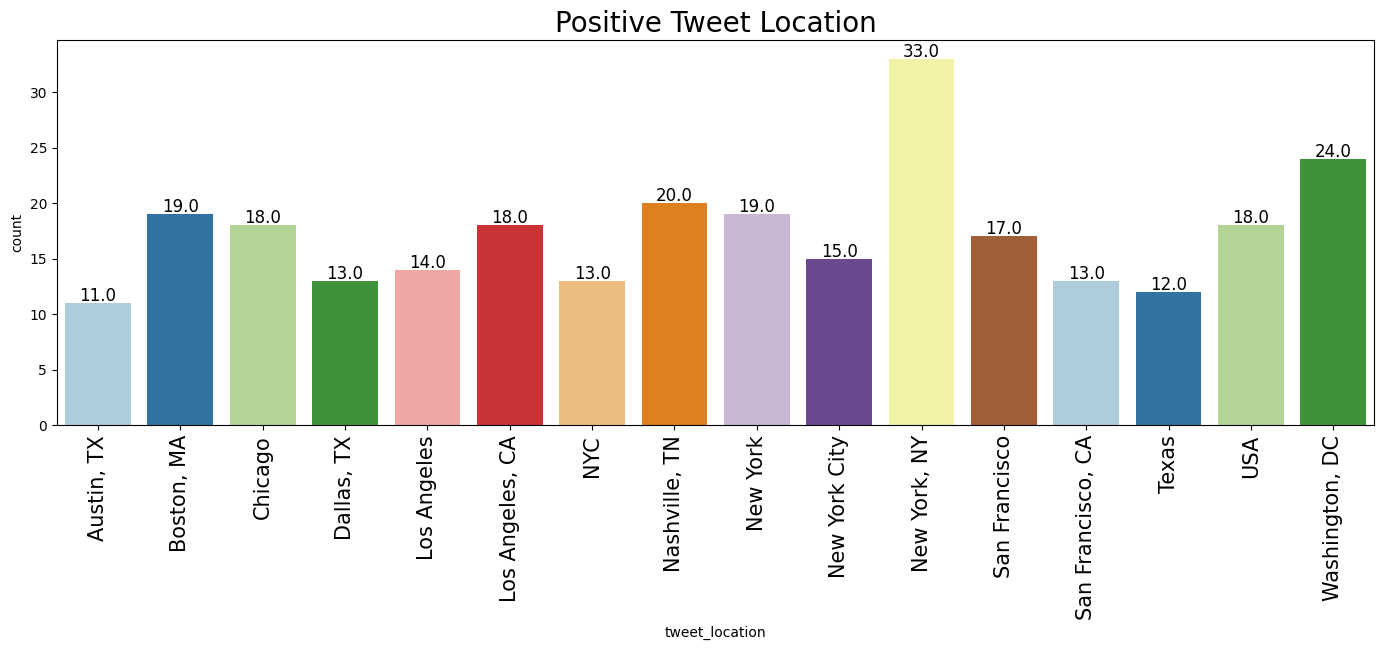

In [43]:
location_positive = positive
location_positive['loc_count'] = location_positive['tweet_location'].map(location_positive['tweet_location'].value_counts())
location_positive = location_positive[location_positive["loc_count"] > 10]
labeled_barplot(location_positive, 'tweet_location', "Positive Tweet Location", perc=False)

### Notes:
- Because the data is not normalized comparing the location of the tweets is not easy
- For Negative the low mark was set to 30
- For Neutral the low mark was set to 15
- For Positive the low mark was set to 10
  - This is because we needed to look at some but not all the data
- The most positive (80), neutral (73) and negative (245) were from New York (or a variation of New York)
- Washington DC (or a variant) was the second most negative (170) but fourth in positive (24) behind Los Angeles (32) and San Francisco (30)
- In general is seems that the East Coast more negative and positive tweets but this could be attibuted to large population on the east coast or just more people on the east coast willing to tweet their flight experience

## Timezone affect on sentiment

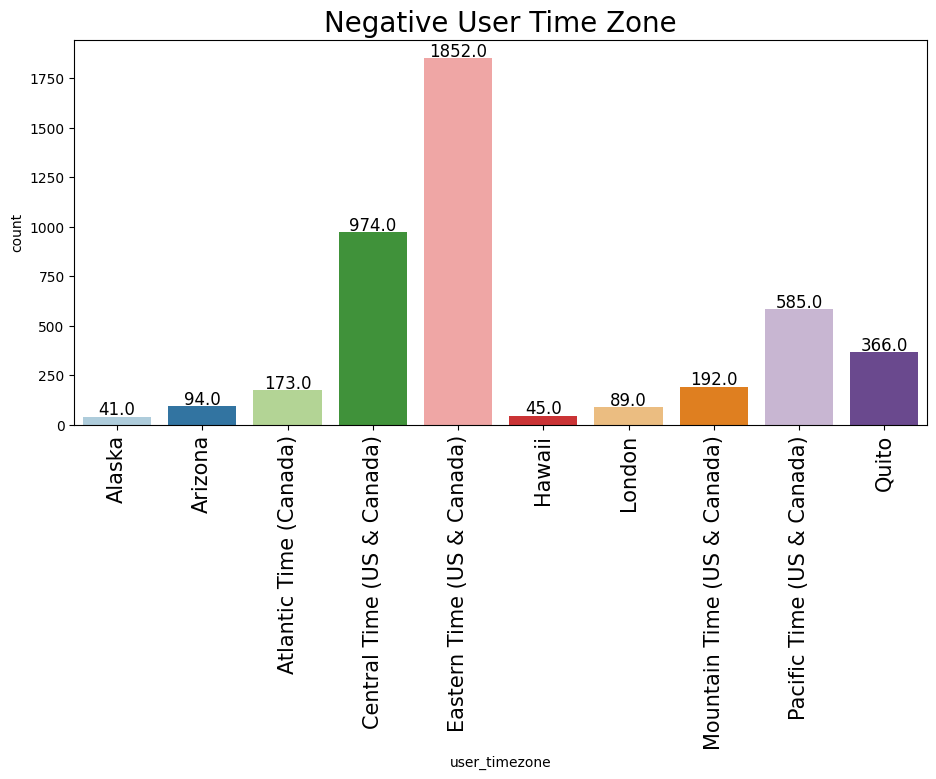

In [44]:
timezone_negative = negative.dropna()
timezone_negative = timezone_negative.reset_index(drop=True)
timezone_negative['loc_count'] = timezone_negative['user_timezone'].map(timezone_negative['user_timezone'].value_counts())
timezone_negative = timezone_negative[timezone_negative["loc_count"] > 30]
labeled_barplot(timezone_negative, 'user_timezone', "Negative User Time Zone", perc=False)

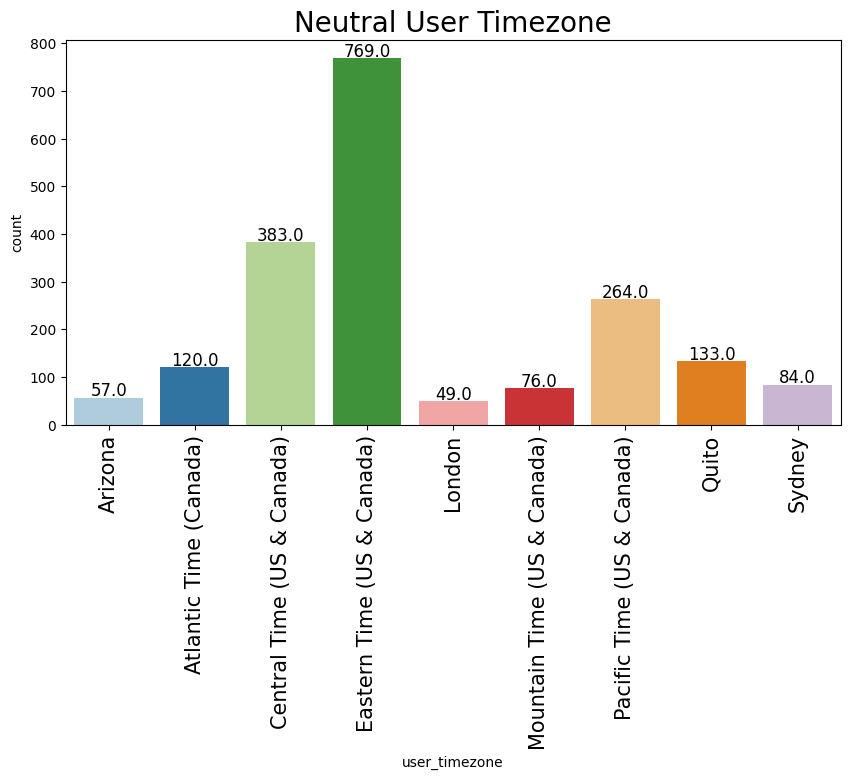

In [45]:
timezone_neutral = neutral
timezone_neutral['loc_count'] = timezone_neutral['user_timezone'].map(timezone_neutral['user_timezone'].value_counts())
timezone_neutral = timezone_neutral[timezone_neutral["loc_count"] > 30]
labeled_barplot(timezone_neutral, 'user_timezone', "Neutral User Timezone", perc=False)

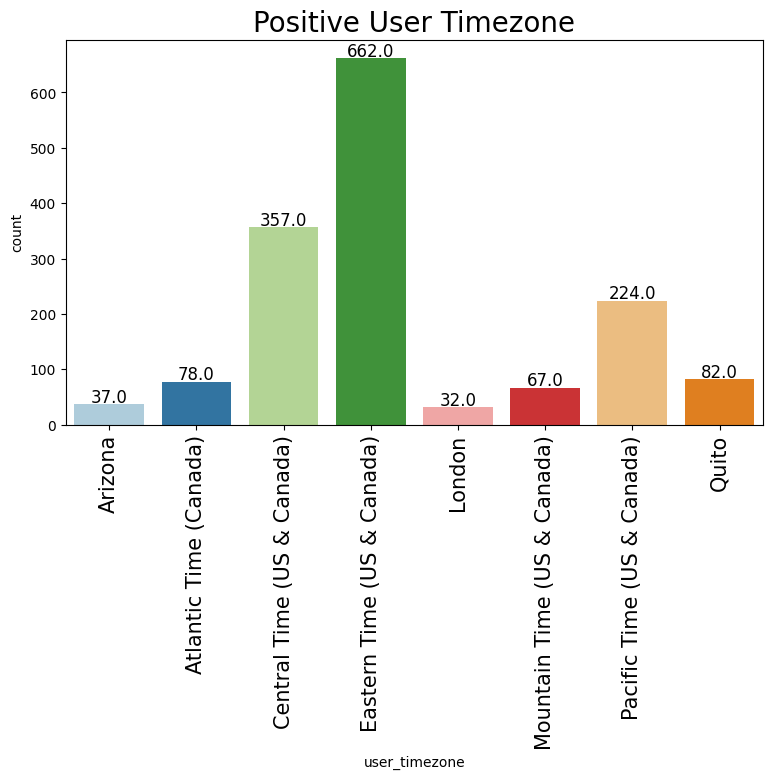

In [46]:
timezone_positive = positive
timezone_positive['loc_count'] = timezone_positive['user_timezone'].map(timezone_positive['user_timezone'].value_counts())
timezone_positive = timezone_positive[timezone_positive["loc_count"] > 30]
labeled_barplot(timezone_positive, 'user_timezone', "Positive User Timezone", perc=False)

### Notes
- Similar to the location of the tweets the user_timezone shows that most of the tweets negative, neutral, and positive are from the Eastern Time (US & Canada)
- Central Time (US & Canada) comes in second for Negative, Neutral and Positive
- Pacific Time (US & Canada) comees in third for Negative, Neutral and Positive

#### Thoughts
- More people in the US and Canada are using Twitter
- More people in the US and Canada are tweeting about their flight experience

## Cleaning up some variable and dataframes that are not needed any longer

In [47]:
del timezone_negative, timezone_neutral, timezone_positive
del location_negative, location_neutral, location_positive
del negative, neutral, positive

## Dropping many columns from the dataframe as they will not help with the models

In [48]:
clean_data = data.copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   name                          14640 non-null  object 
 6   retweet_count                 14640 non-null  int64  
 7   text                          14640 non-null  object 
 8   tweet_created                 14640 non-null  object 
 9   tweet_location                9907 non-null   object 
 10  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [49]:
clean_data.drop(['airline_sentiment_confidence', 'negativereason_confidence', 'name', 'retweet_count', 'tweet_created', 'tweet_location', 'user_timezone'], inplace=True, axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   negativereason     9178 non-null   object
 2   airline            14640 non-null  object
 3   text               14640 non-null  object
dtypes: object(4)
memory usage: 457.6+ KB


# Text Preprocessing and Cleaning

In [50]:
# Convert sentiment to integer
def convert_sentiment(sentiment):
  if sentiment == 'positive':
    return 2
  elif sentiment == 'neutral':
    return 1
  elif sentiment == 'negative':
    return 0

In [51]:
clean_data.airline_sentiment = clean_data.airline_sentiment.apply(lambda x : convert_sentiment(x))

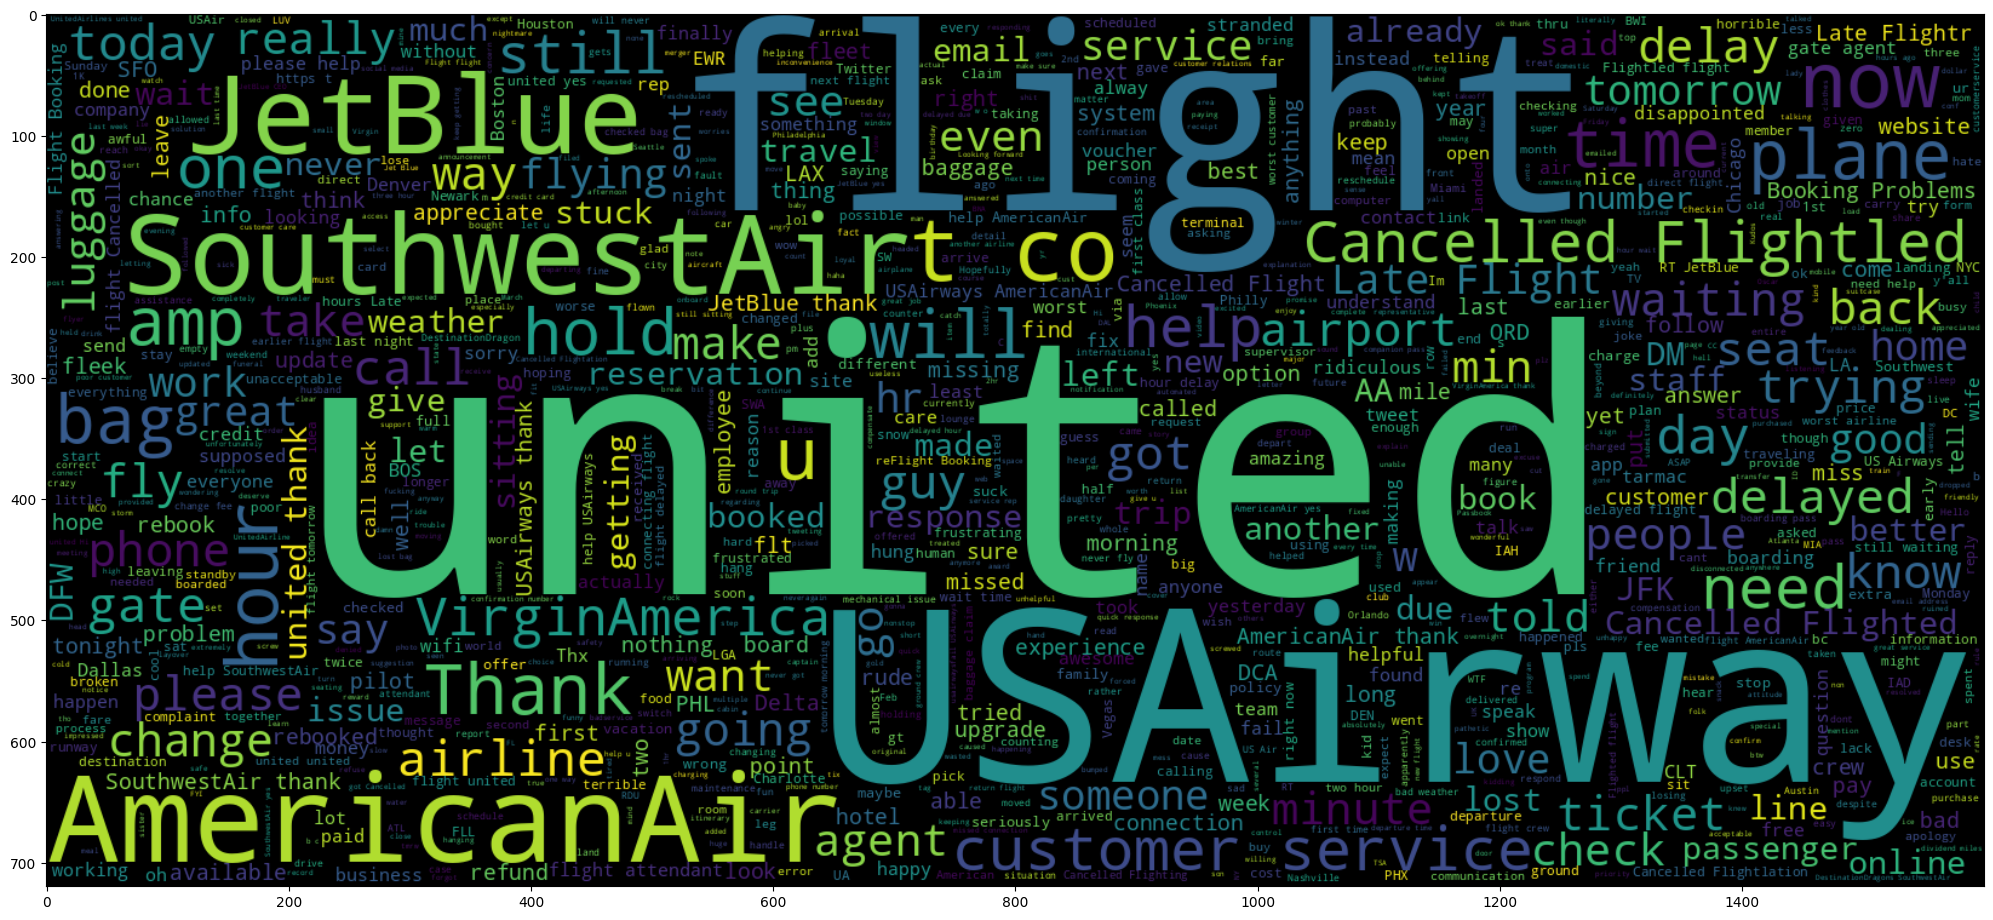

In [52]:
# Cloud of words for all words
cloud_of_words(clean_data['text'])

### Notes:
- flight, united, SouthwestAir, USAirway, AmericanAir, and JetBlue look to be the most common

## Strip out html from the text column


In [53]:
clean_data['text'] = clean_data['text'].apply(lambda x: strip_html(x))

## Replace Contractions

In [54]:
clean_data['text'] = clean_data['text'].apply(lambda x: replace_contractions(x))


## Remove Numbers

In [55]:
clean_data['text'] = clean_data['text'].apply(lambda x: remove_numbers(x))


## Tokenization of the Text column

In [56]:
clean_data['text'] = clean_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [57]:
clean_data.head()                                                                    # Look at tokenized data

airline_sentiment negativereason         airline  \
0                  1            NaN  Virgin America   
1                  2            NaN  Virgin America   
2                  1            NaN  Virgin America   
3                  0     Bad Flight  Virgin America   
4                  0     Can't Tell  Virgin America   

                                                text  
0     [@, VirginAmerica, What, @, dhepburn, said, .]  
1  [@, VirginAmerica, plus, you, have, added, com...  
2  [@, VirginAmerica, I, did, not, today, ..., Mu...  
3  [@, VirginAmerica, it, is, really, aggressive,...  
4  [@, VirginAmerica, and, it, is, a, really, big...

## Normalize the data

In [58]:
clean_data['text'] = clean_data.apply(lambda row: normalize(row['text']), axis=1)
clean_data.tail()

airline_sentiment          negativereason   airline  \
14635                  2                     NaN  American   
14636                  0  Customer Service Issue  American   
14637                  1                     NaN  American   
14638                  0  Customer Service Issue  American   
14639                  1                     NaN  American   

                                                    text  
14635     americanair thank get different flight chicago  
14636  americanair leave minutes late flight warn com...  
14637  americanair please bring american airlines bla...  
14638  americanair money change flight not answer pho...  
14639  americanair people need know many seat next fl...

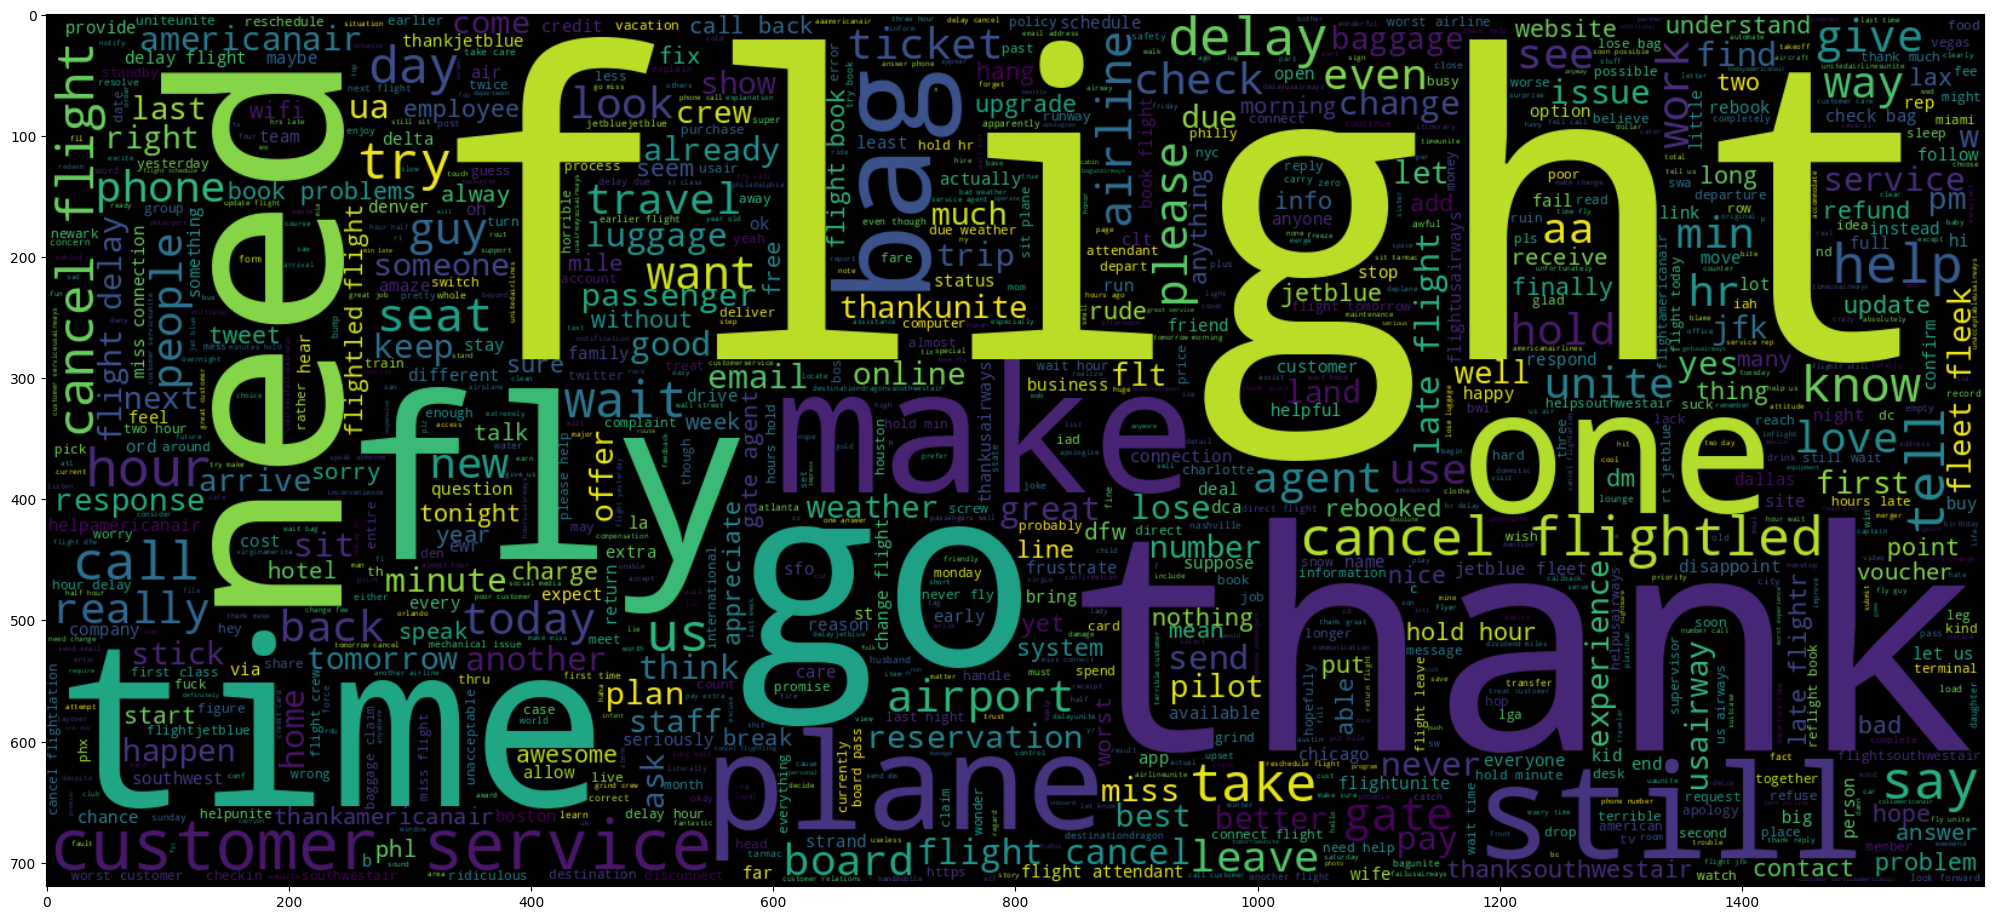

In [59]:
cloud_of_words(clean_data['text'])

### Notes:
- After cleaning up the data flight is still the most common,but now Thank, need, make, go, fly, and time have become more common
- all of the text has been converted to lowercase
- all the numbers have been removed
- all the HTML and Emojis have been removed

In [60]:
# Separate the text of the tweet and the sentiment into data frames of their own
X = clean_data['text']
y = clean_data['airline_sentiment']

## CountVectorizer

In [61]:
countv = CountVectorizer()
X_count = countv.fit_transform(X)
X_count = X_count.toarray()

In [62]:
X_count.shape

(14640, 11982)

## TfidVectorizer

In [63]:
tfid = TfidfVectorizer()
X_tfid = tfid.fit_transform(X)
X_tfid = X_tfid.toarray()

In [64]:
X_tfid.shape

(14640, 11982)

## Handling imbalance for both Count and Tfid Vectorizer

In [65]:
smote = SMOTE()
x_count_sm, y_count_sm = smote.fit_resample(X_count, y)
x_tfid_sm, y_tfid_sm = smote.fit_resample(X_tfid, y)

# Splitting the dataset

In [66]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(x_count_sm, y_count_sm, test_size=0.3, random_state=1)
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(x_tfid_sm, y_tfid_sm, test_size=0.3, random_state=1)


In [67]:
print("Count Shape")
print(f"X_train_count : {X_train_count.shape}")
print(f"y_train_count : {y_train_count.shape}")
print("-"*50)
print(f"X_test_count  : {X_test_count.shape}")
print(f"y_test_count  : {y_test_count.shape}")
print(f"\n")
print("Tfid Shape")
print(f" X_train_tfid : {X_train_tfid.shape}")
print(f" y_train_tfid : {y_train_tfid.shape}")
print("-"*50)
print(f" X_test_tfid  : {X_test_tfid.shape}")
print(f" y_test_tfid  : {y_test_tfid.shape}")


Count Shape
X_train_count : (19273, 11982)
y_train_count : (19273,)
--------------------------------------------------
X_test_count  : (8261, 11982)
y_test_count  : (8261,)


Tfid Shape
 X_train_tfid : (19273, 11982)
 y_train_tfid : (19273,)
--------------------------------------------------
 X_test_tfid  : (8261, 11982)
 y_test_tfid  : (8261,)


In [68]:
Results = []

In [69]:
def top_features(bow_vec, model):
  all_features = bow_vec.get_feature_names_out()
  top_features = ''
  feat = model.feature_importances_
  features=np.argsort(feat)[::-1]
  for i in features[0:40]:
    top_features += all_features[i]
    top_features += ' '
  return top_features

# Model 1 : Random Forest with Count Vectorizer

In [70]:
new_model()

In [71]:
%%time
random_forest_count = RandomForestClassifier()
random_forest_count.fit(X_train_count, y_train_count)

print(random_forest_count)

RandomForestClassifier()
CPU times: user 1min 55s, sys: 1.32 s, total: 1min 57s
Wall time: 1min 56s


In [72]:
random_forest_count_train_pred = random_forest_count.predict(X_train_count)
random_forest_count_prediction = random_forest_count.predict(X_test_count)

In [73]:
history = accuracy_score(random_forest_count_prediction, y_test_count)
train_score = metrics.classification_report(y_train_count, random_forest_count_train_pred)
test_score = metrics.classification_report(y_test_count, random_forest_count_prediction)
conf_matrix = confusion_matrix(y_test_count, random_forest_count_prediction)

print(conf_matrix)

topWords = top_features(countv, random_forest_count) 

Results.append(('Random Forest w Count Vectorizer', history, train_score, test_score, conf_matrix, topWords))

[[2299  356  108]
 [ 252 2186  278]
 [ 141  801 1840]]


## Model 2 Random Forest with Count Vectorizer and Optimal *Learners*

In [74]:
base_learners = [x for x in range(1,25)]

In [75]:
%%time
cv_scores = []
for base in base_learners:
  new_model()
  modelstart = time.time()
  model_cv = RandomForestClassifier(n_estimators = base)
  scores = cross_val_score(model_cv, X_train_count, y_train_count, cv = 5, scoring = 'accuracy')
  cv_scores.append(scores.mean())
  modelend = time.time()
  print(f"Model: {base} | scores: {scores.mean()} | Time: {modelend - modelstart}")

Model: 1 | scores: 0.6808483446039858 | Time: 6.496696949005127
Model: 2 | scores: 0.7178951576915388 | Time: 9.904239892959595
Model: 3 | scores: 0.7195042259057411 | Time: 13.102384090423584
Model: 4 | scores: 0.7336164693545271 | Time: 16.294215202331543
Model: 5 | scores: 0.7314376156428175 | Time: 20.30094575881958
Model: 6 | scores: 0.7380274574498374 | Time: 23.75760054588318
Model: 7 | scores: 0.7389098596839102 | Time: 27.129896640777588
Model: 8 | scores: 0.7476264322209412 | Time: 30.738043069839478
Model: 9 | scores: 0.7440977386675929 | Time: 34.46674108505249
Model: 10 | scores: 0.7478854317477689 | Time: 37.40383005142212
Model: 11 | scores: 0.7481969177171696 | Time: 40.66625094413757
Model: 12 | scores: 0.7527110210087116 | Time: 44.501128911972046
Model: 13 | scores: 0.7536969153614046 | Time: 47.119022369384766
Model: 14 | scores: 0.7547866787551061 | Time: 50.653000593185425
Model: 15 | scores: 0.7524000331153241 | Time: 53.39139747619629
Model: 16 | scores: 0.75291

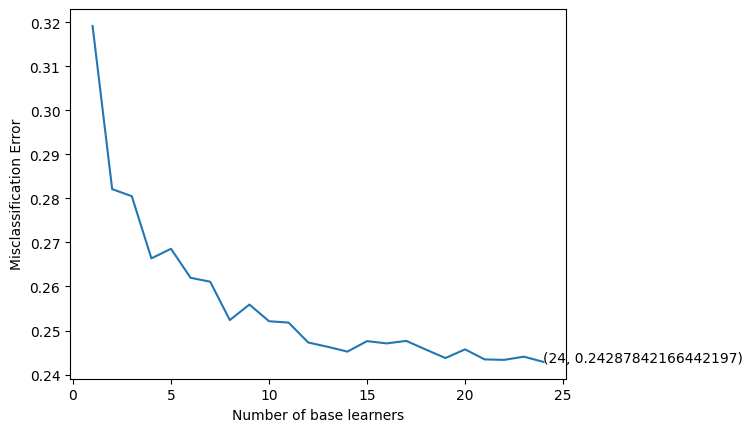

In [76]:
error = [1 - x for x in cv_scores]
optimal_learners = base_learners[error.index(min(error))]

plt.plot(base_learners, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel('Number of base learners')
plt.ylabel('Misclassification Error')
plt.show()

In [77]:
%%time
new_model()
model_cv = RandomForestClassifier(n_estimators = optimal_learners)
model_cv.fit(X_train_count, y_train_count)
model_cv.score(X_test_count, y_test_count)


CPU times: user 27.7 s, sys: 126 ms, total: 27.8 s
Wall time: 27.7 s


0.7608037767824719

In [78]:
model_cv_train_pred = model_cv.predict(X_train_count)
model_cv_prediction = model_cv.predict(X_test_count)

In [79]:
history = accuracy_score(model_cv_prediction, y_test_count)
train_score = metrics.classification_report(y_train_count, model_cv_train_pred) 
test_score = metrics.classification_report(y_test_count, model_cv_prediction)
conf_matrix = confusion_matrix(y_test_count, model_cv_prediction)

print(conf_matrix)

topWords = top_features(countv, model_cv) 

Results.append(('Random Forest w Count Vectorizer and optimal learners', history, train_score, test_score, conf_matrix, topWords))

[[2262  380  121]
 [ 238 2188  290]
 [ 149  798 1835]]


# Model 3 Random Forest with Tfid Vectorizer

In [80]:
new_model()

In [81]:
%%time
random_forest_tfid = RandomForestClassifier()
random_forest_tfid.fit(X_train_tfid, y_train_tfid)

CPU times: user 1min 27s, sys: 196 ms, total: 1min 28s
Wall time: 1min 27s


RandomForestClassifier()

In [82]:
random_forest_tfid_train_pred = random_forest_tfid.predict(X_train_tfid)
random_forest_tfid_prediction = random_forest_tfid.predict(X_test_tfid)

In [83]:
history = accuracy_score(random_forest_tfid_prediction, y_test_tfid)
train_score = metrics.classification_report(y_train_tfid, random_forest_tfid_train_pred)
test_score = metrics.classification_report(y_test_tfid, random_forest_tfid_prediction)
conf_matrix = confusion_matrix(y_test_tfid, random_forest_tfid_prediction)

print(conf_matrix)

topWords = top_features(tfid, random_forest_tfid) 

Results.append(('Random Forest w Tfid Vectorizer', history, train_score, test_score, conf_matrix, topWords))

[[2422  274   67]
 [ 225 2391  100]
 [ 110  138 2534]]


## Model 4: Random Forest with Tfid Vecorizer and Optimal Learners

In [84]:
new_model()

In [85]:
%%time
cv_scores = []
for base in base_learners:
  new_model()
  modelstart = time.time()
  model2_cv = RandomForestClassifier(n_estimators = base)
  scores2 = cross_val_score(model2_cv, X_train_tfid, y_train_tfid, cv = 5, scoring = 'accuracy')
  cv_scores.append(scores2.mean())
  modelend = time.time()
  print(f"Model: {base} | scores: {scores2.mean()} | Time: {modelend - modelstart}")

Model: 1 | scores: 0.7211646094108097 | Time: 5.307587623596191
Model: 2 | scores: 0.7141074915343905 | Time: 7.809064626693726
Model: 3 | scores: 0.7814038878198204 | Time: 10.828076839447021
Model: 4 | scores: 0.7990451748213153 | Time: 13.87826156616211
Model: 5 | scores: 0.8177762521395394 | Time: 16.375425100326538
Model: 6 | scores: 0.823535478156338 | Time: 19.07174587249756
Model: 7 | scores: 0.8307997283466502 | Time: 21.77563452720642
Model: 8 | scores: 0.8384268740278262 | Time: 24.752216815948486
Model: 9 | scores: 0.8465730149146843 | Time: 28.012240409851074
Model: 10 | scores: 0.8504641866519668 | Time: 30.45734405517578
Model: 11 | scores: 0.8543562603106782 | Time: 32.6530487537384
Model: 12 | scores: 0.8546675308958571 | Time: 35.70750570297241
Model: 13 | scores: 0.857105828364352 | Time: 38.74022030830383
Model: 14 | scores: 0.8582992992608955 | Time: 40.86247897148132
Model: 15 | scores: 0.8607378390366403 | Time: 43.62449789047241
Model: 16 | scores: 0.86203501743

In [86]:
%%time
model2_cv = RandomForestClassifier(n_estimators = optimal_learners)
model2_cv.fit(X_train_tfid, y_train_tfid)
model2_cv.score(X_test_tfid, y_test_tfid)


CPU times: user 20.9 s, sys: 128 ms, total: 21 s
Wall time: 20.9 s


0.8756809103014163

In [87]:
model2_cv_train_pred = model2_cv.predict(X_train_tfid)
model2_cv_prediction = model2_cv.predict(X_test_tfid)

In [88]:
history = accuracy_score(model2_cv_prediction, y_test_tfid)
train_score = metrics.classification_report(y_train_tfid, model2_cv_train_pred)
test_score = metrics.classification_report(y_test_tfid, model2_cv_prediction)
conf_matrix = confusion_matrix(y_test_tfid, model2_cv_prediction)

print(conf_matrix)

topWords = top_features(tfid, random_forest_count) 

Results.append(('Random Forest w Count Vectorizer and optimal learners', history, train_score, test_score, conf_matrix, topWords))

[[2411  273   79]
 [ 291 2330   95]
 [ 134  155 2493]]


# Model 5: XGBClassifier with Count Vectorizer

In [89]:
new_model()

In [90]:
xgb_count = XGBClassifier()
xgb_count.fit(X_train_count, y_train_count)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [91]:
%%time
xgb_count_train_pred = xgb_count.predict(X_train_count)
xgb_count_prediction = xgb_count.predict(X_test_count)

CPU times: user 3.57 s, sys: 5.46 ms, total: 3.58 s
Wall time: 1.16 s


In [92]:
history = accuracy_score(xgb_count_prediction, y_test_count)
train_score = metrics.classification_report(y_train_count, xgb_count_train_pred)
test_score = metrics.classification_report(y_test_count, xgb_count_prediction)
conf_matrix = confusion_matrix(y_test_count, xgb_count_prediction)

print(conf_matrix)

topWords = top_features(countv, xgb_count) 

Results.append(('XGBClassfier w Count Vectorizer', history, train_score, test_score, conf_matrix, topWords))

[[2277  351  135]
 [ 254 2210  252]
 [ 114  897 1771]]


# Model 6 XGBClassifier with Tfid Vectorizer

In [93]:
new_model()

In [94]:
%%time
xgb_tfid = XGBClassifier()
xgb_tfid.fit(X_train_tfid, y_train_tfid)

CPU times: user 46min 41s, sys: 1.91 s, total: 46min 42s
Wall time: 12min 33s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
xgb_tfid_train_pred = xgb_tfid.predict(X_train_tfid)
xgb_tfid_prediction = xgb_tfid.predict(X_test_tfid)

In [96]:
history = accuracy_score(xgb_tfid_prediction, y_test_tfid)
train_score = metrics.classification_report(y_train_tfid, xgb_tfid_train_pred)
test_score = metrics.classification_report(y_test_tfid, xgb_tfid_prediction)
conf_matrix = confusion_matrix(y_test_tfid, xgb_tfid_prediction)

print(conf_matrix)

topWords = top_features(tfid, xgb_tfid) 

Results.append(('XGBClassfier w Tfid Vectorizer', history, train_score, test_score, conf_matrix, topWords))

[[2335  344   84]
 [ 292 2225  199]
 [ 118  244 2420]]


# Summary Report of all models

Random Forest w Count Vectorizer
--------------------------------------------------
History:
0.7656458055925432

Training Clssification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6415
           1       0.80      0.94      0.87      6462
           2       0.93      0.77      0.84      6396

    accuracy                           0.90     19273
   macro avg       0.91      0.90      0.90     19273
weighted avg       0.91      0.90      0.90     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2763
           1       0.65      0.80      0.72      2716
           2       0.83      0.66      0.73      2782

    accuracy                           0.77      8261
   macro avg       0.78      0.77      0.77      8261
weighted avg   

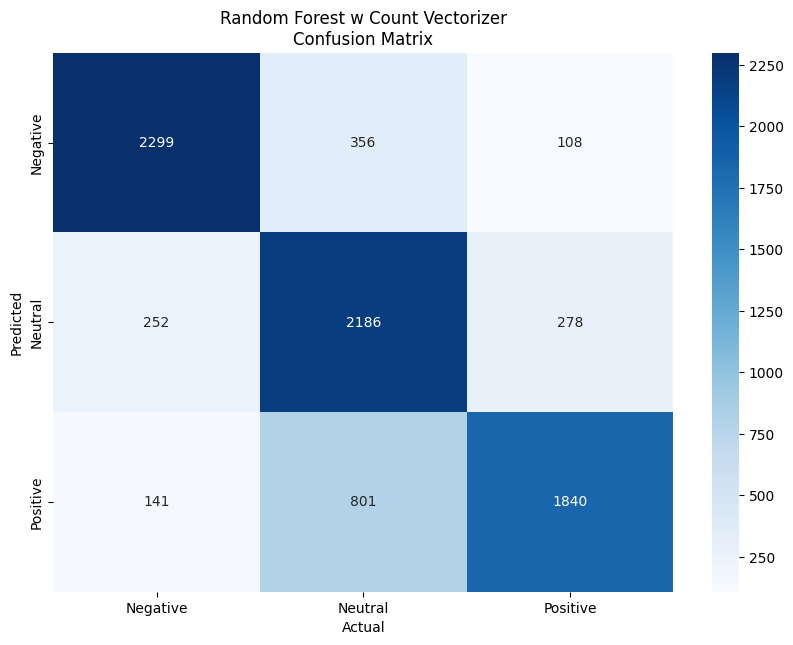



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



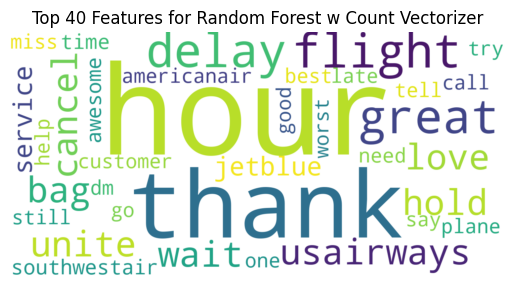



----------------------------------------------------------------------------------------------------


Random Forest w Count Vectorizer and optimal learners
--------------------------------------------------
History:
0.7608037767824719

Training Clssification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6415
           1       0.80      0.94      0.86      6462
           2       0.93      0.77      0.84      6396

    accuracy                           0.90     19273
   macro avg       0.91      0.90      0.90     19273
weighted avg       0.91      0.90      0.90     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2763
           1       0.65      0.81      0.72      2716
           2       0.82      0.66      0.73      278

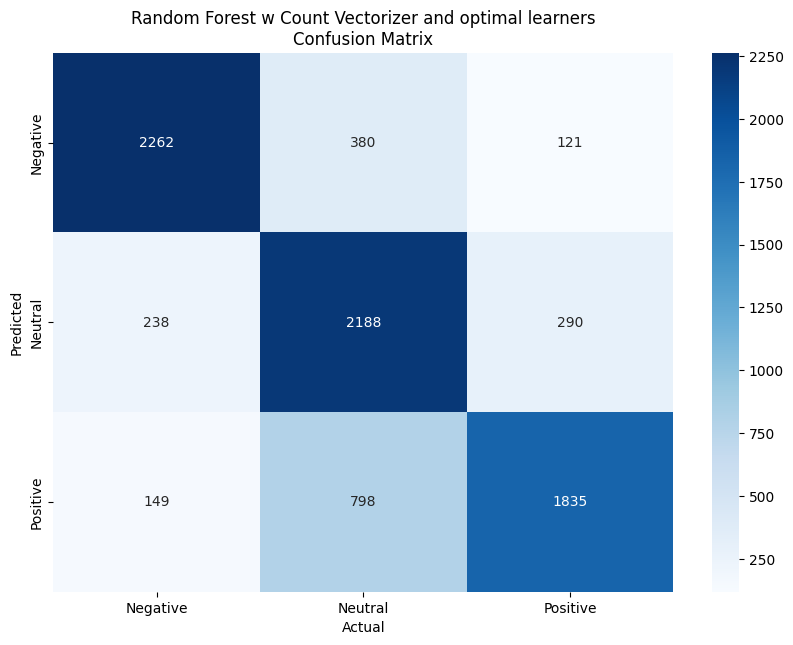



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



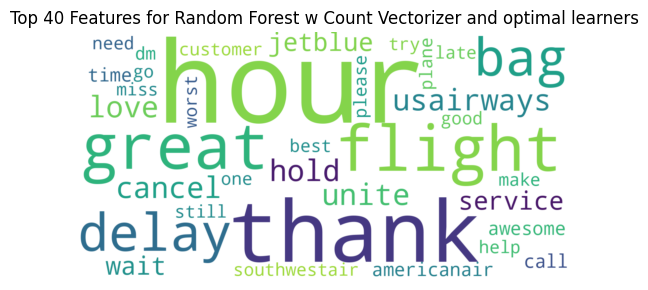



----------------------------------------------------------------------------------------------------


Random Forest w Tfid Vectorizer
--------------------------------------------------
History:
0.889359641689868

Training Clssification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6415
           1       1.00      0.99      1.00      6462
           2       0.99      1.00      1.00      6396

    accuracy                           1.00     19273
   macro avg       1.00      1.00      1.00     19273
weighted avg       1.00      1.00      1.00     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2763
           1       0.85      0.88      0.87      2716
           2       0.94      0.91      0.92      2782

    accuracy        

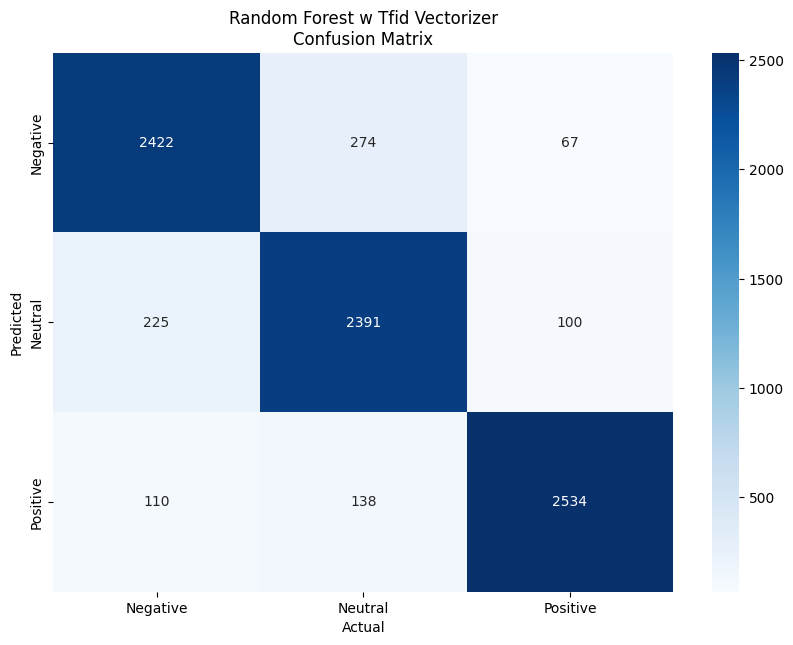



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



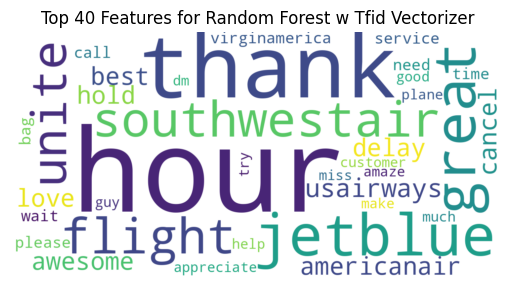



----------------------------------------------------------------------------------------------------


Random Forest w Count Vectorizer and optimal learners
--------------------------------------------------
History:
0.8756809103014163

Training Clssification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6415
           1       1.00      0.99      0.99      6462
           2       0.99      1.00      1.00      6396

    accuracy                           1.00     19273
   macro avg       1.00      1.00      1.00     19273
weighted avg       1.00      1.00      1.00     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2763
           1       0.84      0.86      0.85      2716
           2       0.93      0.90      0.92      278

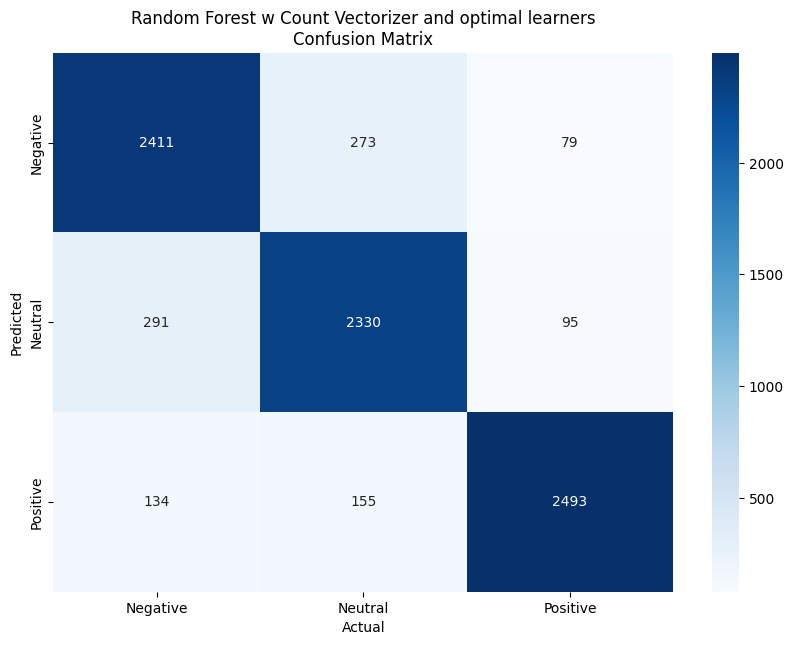



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



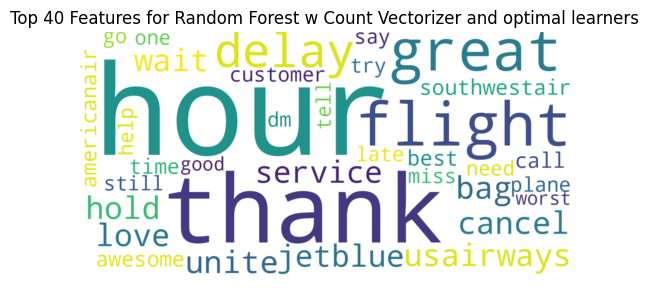



----------------------------------------------------------------------------------------------------


XGBClassfier w Count Vectorizer
--------------------------------------------------
History:
0.7575354073356736

Training Clssification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6415
           1       0.68      0.85      0.76      6462
           2       0.85      0.68      0.75      6396

    accuracy                           0.80     19273
   macro avg       0.81      0.80      0.80     19273
weighted avg       0.81      0.80      0.80     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2763
           1       0.64      0.81      0.72      2716
           2       0.82      0.64      0.72      2782

    accuracy       

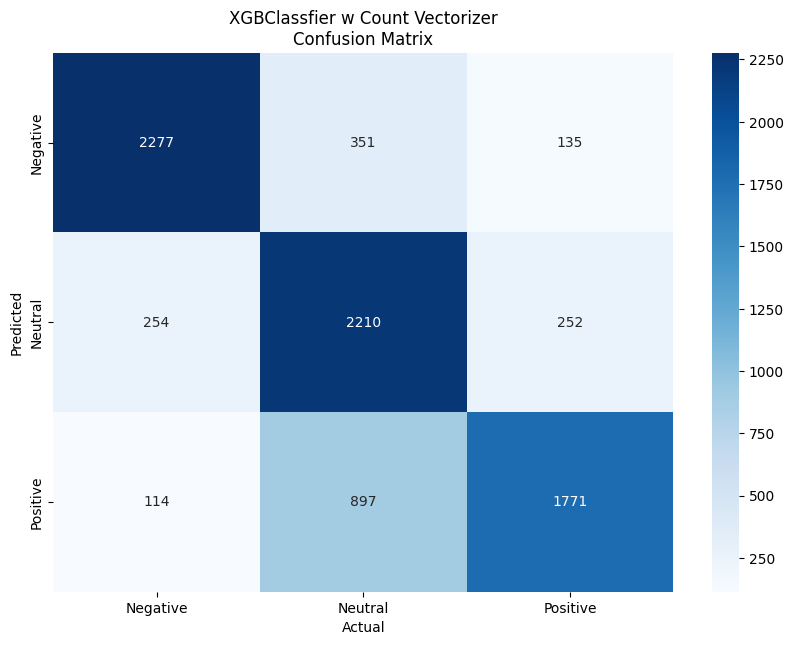



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



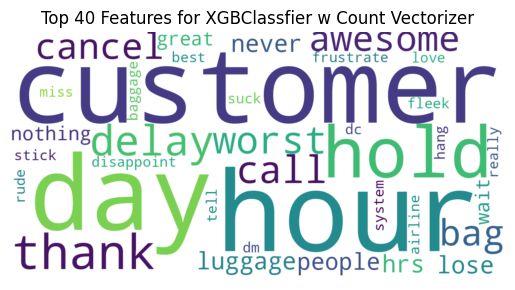



----------------------------------------------------------------------------------------------------


XGBClassfier w Tfid Vectorizer
--------------------------------------------------
History:
0.8449340273574628

Training Clssification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6415
           1       0.87      0.90      0.89      6462
           2       0.93      0.92      0.93      6396

    accuracy                           0.91     19273
   macro avg       0.91      0.91      0.91     19273
weighted avg       0.91      0.91      0.91     19273


----------------------------------------------------------------------------------------------------


Testing Clssification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2763
           1       0.79      0.82      0.80      2716
           2       0.90      0.87      0.88      2782

    accuracy        

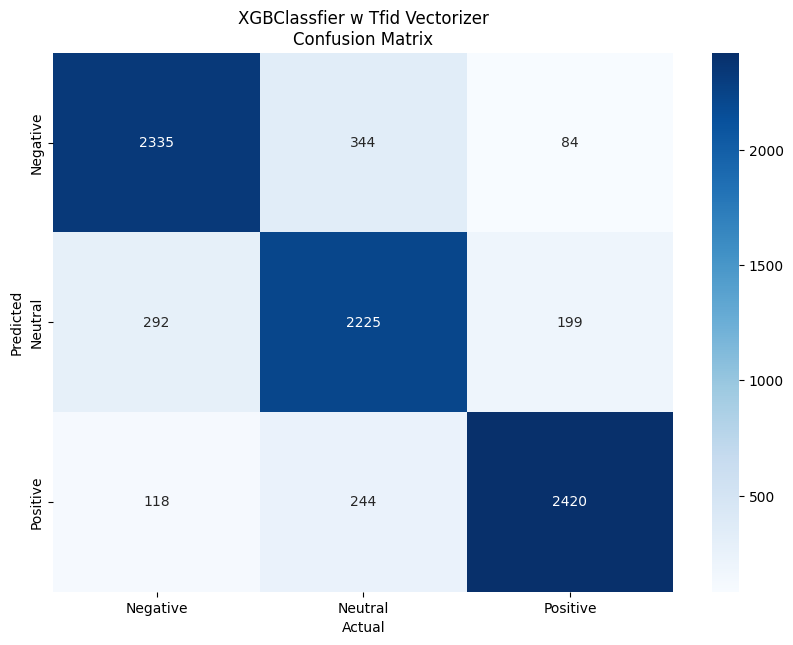



----------------------------------------------------------------------------------------------------
Top 40 Features WordCloud



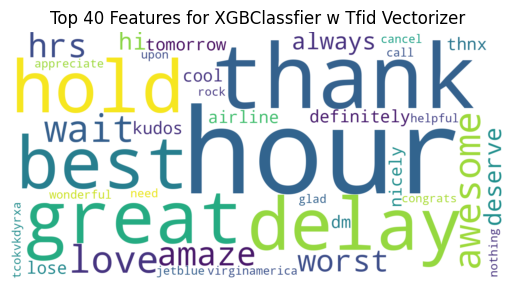



----------------------------------------------------------------------------------------------------




In [97]:
sentiment_classes = ['Negative', 'Neutral', 'Positive']

for result in Results:
  print(f"{result[0]}")
  print("-"*50)
  print(f"History:\n{result[1]}\n")
  print(f"Training Clssification Report:\n{result[2]}\n")
  print("-"*100)
  print(f"\n")
  print(f"Testing Clssification Report:\n{result[3]}\n")
  print("-"*100)
  print(f"\n")

  df_cm = pd.DataFrame(result[4], index = [i for i in "123"], columns = [i for i in "123"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, fmt='d',
              xticklabels=sentiment_classes,
              yticklabels=sentiment_classes)
  plt.title(f'{result[0]}\nConfusion Matrix', fontsize=12)
  plt.xlabel('Actual', fontsize=10)
  plt.ylabel('Predicted', fontsize=10)
  plt.show()
  print(f"\n")
  print("-"*100)
  print(f"Top 40 Features WordCloud\n")
  model_word_cloud = WordCloud(background_color="white", width=1500, height=750).generate(result[5])
  plt.imshow(model_word_cloud, interpolation='bilinear')
  plt.figure(1, figzize=(45,45), frameon='equal')
  plt.title(f'Top 40 Features for {result[0]}', fontsize=12)
  plt.axis("off")
  plt.show()
  print(f"\n")
  print("-"*100)
  print(f"\n")


# Executive Summary of Analysis

## Conclusions
1. Of the six models RandomForest with Tfidvectorizer has the best results with 89.1% on test data and 100% on Train data, with recall of 89%.  The model is slightly overfit


  Model                            | Train|  Test | Recall
-----------------------------------|------|-------|--------
Model1 - RF w/ CountVectorizer     |  90% | 76.6% |  77%   
Model2 - RF w/ CV Optimal Learners |  90% | 75.7% |  76%   
Model3 - RF w/ TfidVectorizer      | 100% | 89.1% |  89%   
Model4 - RF w/ TV Optimal Learner  | 100% | 87.7% |  88%   
Model5 - XGB w/ CountVectorizer    |  80% | 76.2% |  76%   
Model6 - XGB w/ TfidVectorizer     |  90% | 84.4% |  84%   

2. Many of the key words are similar across all the models:
- hour, thank, great, flight are in all the top 40
- The top model (3) the key words are:
  - hour, thank, great, flight, & jetblue

3. For Model 3, neutral sentiment seems to be the most difficult to predict with 256 predicted negative but were actually neutral and 103 predicted positve but were actually neutral

4. Beyond the models, the EDA shows that:
  - United has the most negative tweets
  - Virgin America had the most balanced distribution of sentiment but also had the lowest total number of tweets
  - Passengers from the US tweet their sentiment more than any other country
  - East Coast Passengers tweet more about their feelings about flights than other parts of the United States

5. Using tools like Vader may achieve higher accuracy and recall but lack of time prevented this from being added to the model

6. This notebook takes aproximately 64 minutes to run from start to finish





In [98]:
end_total = time.time()
print(f"\n\nTotal Runtime for the entire Notebook is {end_total - begin_total}")



Total Runtime for the entire Notebook is 3830.977972984314
